Assignment 3 CSCN8000 Artificial Intelligence Algorithms and Mathematics

#### PRAMOD KUNJUKUNJU SAJI - 8856432

1.  Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features.

In [373]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [374]:
# Load the Iris dataset from scikit-learn
X_iris, y_iris = load_iris(return_X_y=True, as_frame=True)

# Preview the data
X_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Drop the other two features for simplicity.

In [375]:
# Drop the first two columns of the iris dataset
X_iris = X_iris.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1)

# Preview the data
X_iris.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Figure out if any preprocessing such as scaling would help here

In [376]:
# scaling
X_iris_scaled = StandardScaler().fit_transform(X_iris)
X_iris_scaled[:5]

array([[-1.34022653, -1.3154443 ],
       [-1.34022653, -1.3154443 ],
       [-1.39706395, -1.3154443 ],
       [-1.2833891 , -1.3154443 ],
       [-1.34022653, -1.3154443 ]])

Draw elbow plot and from that figure out optimal value of k

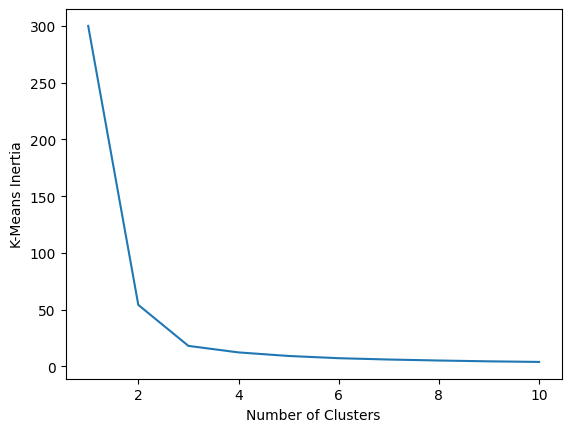

In [377]:
# Find and plot the elbow point for the K-Means algorithm on the Iris dataset.
kmeans_inertia_values = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(X_iris_scaled)
    kmeans_inertia_values.append(kmeans.inertia_)

plt.plot(range(1,11), kmeans_inertia_values)
plt.xlabel('Number of Clusters')
plt.ylabel('K-Means Inertia')

plt.show()

Optimal value of k = 3

2.  Use the heart dataset from the Resources Folder or access it from https://www.kaggle.com/fedesoriano/heart-failure-prediction

 Load heart disease dataset in pandas dataframe

In [378]:
# Read the data from the file 'heart.csv'
heart_df = pd.read_csv('heart.csv')

# Preview the data
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3

In [379]:
# Get the numeric columns, drop the target and fasting blood sugar columns
numeric_columns = heart_df.select_dtypes(include=['number']).drop(columns=['HeartDisease', 'FastingBS']).columns.tolist()
numeric_columns

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [380]:
# Apply z-score to the numeric columns
z_score = zscore(heart_df[numeric_columns])
heart_df_zscore_applied = heart_df[(z_score > -3).all(axis=1) & (z_score < 3).all(axis=1)]
heart_df_zscore_applied.reset_index(drop=True, inplace=True)

# Preview the data
heart_df_zscore_applied.head()

print(f'Count of records before : {len(heart_df)}')
print(f'Count of records after : {len(heart_df_zscore_applied)}')

Count of records before : 918
Count of records after : 899


Convert text columns to numbers using label encoding / one hot encoding

In [381]:
# Get the non-numeric columns
non_numeric_columns = heart_df_zscore_applied.select_dtypes(exclude=['number']).columns.tolist()
non_numeric_columns

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [382]:
# Encoding categorical data
encoded_data = heart_df_zscore_applied.copy()
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    encoded_data[column] = label_encoder.fit_transform(heart_df_zscore_applied[column])

# Preview the encoded data
encoded_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


Apply scaling

In [383]:
# Scale the numeric columns using StandardScaler
scaled_df = encoded_data.copy()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(scaled_df[numeric_columns])
scaled_df[numeric_columns] = scaled_data

# Preview the scaled data
scaled_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.428154,1,1,0.465900,0.849636,0,1,1.384320,0,-0.855469,2,0
1,-0.475855,0,2,1.634714,-0.168122,0,1,0.752973,0,0.137516,1,1
2,-1.745588,1,1,-0.118507,0.793612,0,2,-1.535661,0,-0.855469,2,0
3,-0.581666,0,0,0.349019,0.149344,0,1,-1.141069,1,0.634008,1,1
4,0.053200,1,2,1.050307,-0.028064,0,1,-0.588640,0,-0.855469,2,0


Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy

In [384]:
# Seperate data and target
X_h = scaled_df.drop(scaled_df.columns[-1], axis=1)
y_h = scaled_df[scaled_df.columns[-1]]

# Split data into train and test
X_h_train, X_h_test, y_h_train, y_h_test = train_test_split(X_h, y_h, test_size=0.2)

# Support Vector Classification model
svc_model = SVC(kernel='linear', random_state=123)
svc_model.fit(X_h_train, y_h_train)

# Logistic regression model
logistic_reg_model = LogisticRegression(random_state=123)
logistic_reg_model.fit(X_h_train, y_h_train)

# Random Forest model
random_forest_model = RandomForestClassifier(random_state=123)
random_forest_model.fit(X_h_train, y_h_train)

# Evaluate models
svc_model_accuracy = accuracy_score(y_h_test, svc_model.predict(X_h_test))
logistic_reg_model_accuracy = accuracy_score(y_h_test, logistic_reg_model.predict(X_h_test))
random_forest_model_accuracy = accuracy_score(y_h_test, random_forest_model.predict(X_h_test))

Now use PCA to reduce dimensions, retrain your model and see its impact on your model in terms of accuracy.

In [385]:
# Fit PCA to the data
pca = PCA()
transformed_data = pca.fit_transform(X_h)

# Calculate cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components that explain at least 95% variance
n_components = np.argmax(explained_variance >= 0.95) + 1

# Create a new PCA instance with the determined number of components
pca = PCA(n_components=n_components)
transformed_data = pca.fit_transform(X_h)

# Create a new dataframe with the transformed data and the target column
transformed_df = pd.DataFrame(transformed_data, columns=[f"component_{i+1}" for i in range(n_components)])
transformed_df['target'] = y_h.values

# Split the data into train and test sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(transformed_df.drop(columns=['target']), y, test_size=0.2, random_state=42)

In [386]:
# Support Vector Classification model
svc_model_pca = SVC(kernel='linear', random_state=123)
svc_model_pca.fit(X_train_pca, y_train_pca)

# Logistic regression model
logistic_reg_model_pca = LogisticRegression(random_state=123)
logistic_reg_model_pca.fit(X_train_pca, y_train_pca)

# Random Forest model
random_forest_model_pca = RandomForestClassifier(random_state=123)
random_forest_model_pca.fit(X_train_pca, y_train_pca)

# Evaluate models
svc_model_accuracy_pca = accuracy_score(y_test_pca, svc_model_pca.predict(X_test_pca))
logistic_reg_model_accuracy_pca = accuracy_score(y_test_pca, logistic_reg_model_pca.predict(X_test_pca))
random_forest_model_accuracy_pca = accuracy_score(y_test_pca, random_forest_model_pca.predict(X_test_pca))

In [387]:
# Print the accuracy of each model
print('SVC: ', svc_model_accuracy)
print('Logistic regression: ', logistic_reg_model_accuracy)
print('Random Forest: ', random_forest_model_accuracy)

SVC:  0.8333333333333334
Logistic regression:  0.8277777777777777
Random Forest:  0.8611111111111112


Random Forest model gives the best accuracy

In [388]:
# Print the accuracy of each model - PCA
print('SVC - PCA: ', svc_model_accuracy_pca)
print('Logistic regression - PCA: ', logistic_reg_model_accuracy_pca)
print('Random Forest - PCA: ', random_forest_model_accuracy_pca)

SVC - PCA:  0.8555555555555555
Logistic regression - PCA:  0.8444444444444444
Random Forest - PCA:  0.8333333333333334


PCA increase the accuracy for SVM and Logistic regression models, but reduced the accuracy for the Random Forest model